![img_uba](https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg)


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
## Alumna: Noelia Qualindi

### Arquitectura del modelo con Fine Tuning 

In [1]:
!pip uninstall -y tensorflow keras
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
  Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl (236.1 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.16.2 requires tensorflow==2.16.2; platform_system == "Darwin" and platform_machine == "arm64", but you have tensorflow 2.17.0 which is incompatible.


In [2]:
!pip install transformers --quiet

In [3]:
# importación de librerias
import tensorflow
from transformers import TFBertModel

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Modelo con 3 clases

In [4]:
max_length = 139
num_classes = 3 # output shapes

In [5]:
# Carga del modelo BERT
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

2024-08-31 22:33:26.422146: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-31 22:33:26.422168: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-08-31 22:33:26.422173: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-08-31 22:33:26.422189: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-31 22:33:26.422201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predicti

In [7]:
bert_model.bert.trainable = True

input_ids = tensorflow.keras.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')
outputs = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = outputs.pooler_output
x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(num_classes, activation='softmax')(x)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.00001)
model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro'), tensorflow.keras.metrics.Precision(), tensorflow.keras.metrics.Recall()]) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 139)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 139)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 139, 7                                     

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_metrics(history):
    # Obtener los datos de precisión y pérdida de entrenamiento y validación
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    
    epoch_count = range(1, len(acc) + 1)
    
    # Graficar precisión
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=acc, label='Train Accuracy')
    sns.lineplot(x=epoch_count, y=val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    
    # Graficar pérdida
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=loss, label='Train Loss')
    sns.lineplot(x=epoch_count, y=val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

## Dataset

In [5]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  47384      0  0:00:02  0:00:02 --:--:-- 58806
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   376k      0  0:00:18  0:00:18 --:--:-- 1766k


In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [10]:
df.tail()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
15741,Tammy Kay,https://lh3.googleusercontent.com/a-/AOh14GhYP...,I believe that this is by far the best app wit...,5,0,NaN,2018-02-17 06:09:03,NaN,NaN,newest,com.appxy.planner
15742,Ysm Johan,https://lh3.googleusercontent.com/a-/AOh14Ggmd...,It sometimes crashes a lot!!,5,0,4.3.7,2018-02-15 10:45:22,NaN,NaN,newest,com.appxy.planner
15743,casey dearden,https://lh3.googleusercontent.com/a-/AOh14Gg2U...,Works well for what I need,5,0,4.3.7,2018-02-09 18:40:37,NaN,NaN,newest,com.appxy.planner
15744,Jerry G Tamate,https://lh3.googleusercontent.com/a-/AOh14GiTP...,Love it.,5,0,NaN,2018-02-06 12:36:17,NaN,NaN,newest,com.appxy.planner
15745,Ahmed elsalamouni,https://lh3.googleusercontent.com/-9QSxVUhCoDI...,Really amazing and helped me sooo much just i ...,5,6,4.3.7,2018-02-04 22:57:09,NaN,NaN,newest,com.appxy.planner


In [11]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


In [12]:
print(df.columns)

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId'],
      dtype='object')


<Axes: xlabel='score', ylabel='count'>

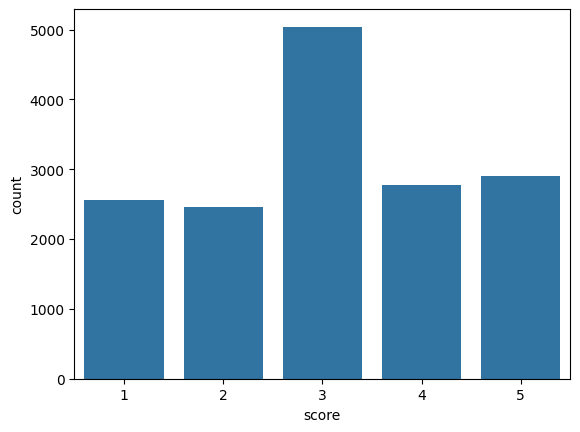

In [13]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [17]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [18]:
word2idx_output = {word: idx for idx, word in enumerate(sorted(df.sentiment.unique()))}

# Agregar manualmente los tokens especiales
word2idx_output['<sos>'] = len(word2idx_output)
word2idx_output['<eos>'] = len(word2idx_output) + 1

print("Diccionario de salida:", word2idx_output)

Diccionario de salida: {0: 0, 1: 1, 2: 2, '<sos>': 3, '<eos>': 5}


/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_56747/767154524.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


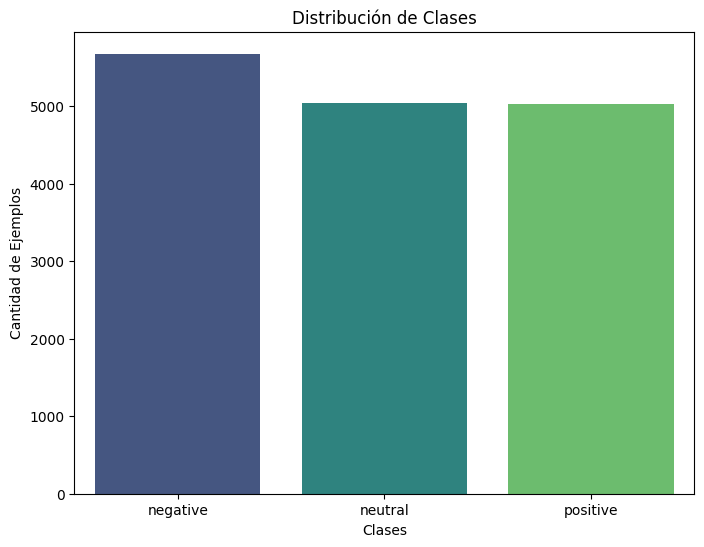

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define los nombres de las clases
class_names = ['negative', 'neutral', 'positive']

# Cuenta la cantidad de ejemplos en cada clase
class_distribution = df['sentiment'].value_counts()

# Mapea las etiquetas numéricas a los nombres de clases
class_distribution.index = class_names

# Grafica la distribución de clases
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de Ejemplos')
plt.show()


sentences shape: (15746,)
["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK."
 'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!'
 "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"]


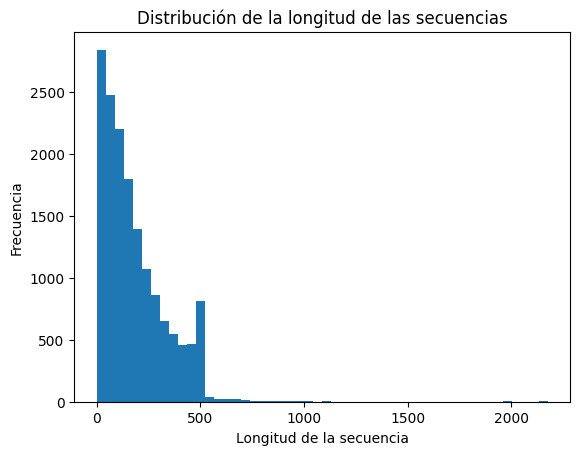

Longitud máxima: 2176
Longitud media: 180.92677505398197
Percentil 90 de la longitud: 422.0
Mediana: 139.0
Media 181.0
Moda ModeResult(mode=4, count=178)


In [20]:
import numpy as np
import scipy.stats as stats

sentences = df['content'].values
print("sentences shape:", sentences.shape)
print(sentences[:3])

sequence_lengths = [len(seq) for seq in sentences]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Longitud de la secuencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud de las secuencias')
plt.show()

print(f"Longitud máxima: {max(sequence_lengths)}")
print(f"Longitud media: {np.mean(sequence_lengths)}")
print(f"Percentil 90 de la longitud: {np.percentile(sequence_lengths, 90)}")

print("Mediana:", round(np.median(sequence_lengths),0))
print('Media', round(np.mean(sequence_lengths),0))
print('Moda', stats.mode(sequence_lengths))

In [21]:
from tensorflow.keras.utils import to_categorical

y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
num_classes = y.shape[1]
print("output shape:", num_classes)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## Procesamiento, Tokenización y generador de datos


In [11]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer, TFBertModel
import numpy as np

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [23]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(sentences))

idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)


print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [24]:
print(f"Cantidad de muestras en el conjunto de entrenamiento: {idx_train.shape[0]}")
print(f"Cantidad de muestras en el conjunto de validación: {idx_val.shape[0]}")
print(f"Cantidad de muestras en el conjunto de test: {idx_test.shape[0]}")

Cantidad de muestras en el conjunto de entrenamiento: 10076
Cantidad de muestras en el conjunto de validación: 2520
Cantidad de muestras en el conjunto de test: 3150


Hiperparámetros

In [25]:
batch_size = 32
epochs = 15

In [26]:
def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, num_classes=3, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([num_classes]),
        ),
    )

In [27]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer,  num_classes=num_classes, max_length=max_length)
train_data = train_data.shuffle(100).batch(batch_size)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, num_classes=num_classes, max_length=max_length)
validation_data = validation_data.batch(batch_size)

In [28]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [29]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

y_test = y[idx_test]

## BERT classification

In [30]:
history_3_classes = model.fit(train_data, epochs=epochs, validation_data=validation_data)

Epoch 1/15


2024-08-31 22:39:00.314705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-08-31 22:39:01.349165: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


    315/Unknown - 489s 1s/step - loss: 0.9448 - accuracy: 0.5152 - f1_score: 0.4995 - precision: 0.6317 - recall: 0.3124

2024-08-31 22:47:03.710480: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-31 22:47:03.710506: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2403237463367434206
2024-08-31 22:47:03.710516: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12664365697821177926
2024-08-31 22:47:03.710519: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[Adam/add/_16]]
2024-08-31 22:47:03.710530: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15515986896884109543
2024-08-31 22:47:03.710534: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14102624673705411586
2024-08-31 22:

315/315 [==============================] - 528s 2s/step - loss: 0.9448 - accuracy: 0.5152 - f1_score: 0.4995 - precision: 0.6317 - recall: 0.3124 - val_loss: 0.8087 - val_accuracy: 0.6198 - val_f1_score: 0.6007 - val_precision: 0.6823 - val_recall: 0.5087
Epoch 2/15


2024-08-31 22:47:42.635441: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5592504762137108618
2024-08-31 22:47:42.635454: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4860425429534487054
2024-08-31 22:47:42.635458: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[model_1/tf_bert_model/bert/embeddings/assert_less/All/_20]]
2024-08-31 22:47:42.635465: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11463728007113934084
2024-08-31 22:47:42.635468: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 929111490884119071
2024-08-31 22:47:42.635471: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4787445749704753125
2024-08

315/315 [==============================] - 434s 1s/step - loss: 0.7848 - accuracy: 0.6331 - f1_score: 0.6246 - precision: 0.6931 - recall: 0.5184 - val_loss: 0.7616 - val_accuracy: 0.6516 - val_f1_score: 0.6208 - val_precision: 0.6843 - val_recall: 0.5762
Epoch 3/15
315/315 [==============================] - 430s 1s/step - loss: 0.7385 - accuracy: 0.6596 - f1_score: 0.6542 - precision: 0.7049 - recall: 0.5734 - val_loss: 0.7466 - val_accuracy: 0.6675 - val_f1_score: 0.6461 - val_precision: 0.6964 - val_recall: 0.5988
Epoch 4/15
315/315 [==============================] - 426s 1s/step - loss: 0.6911 - accuracy: 0.6865 - f1_score: 0.6822 - precision: 0.7169 - recall: 0.6184 - val_loss: 0.7220 - val_accuracy: 0.6706 - val_f1_score: 0.6620 - val_precision: 0.6904 - val_recall: 0.6302
Epoch 5/15
315/315 [==============================] - 434s 1s/step - loss: 0.6573 - accuracy: 0.7068 - f1_score: 0.7033 - precision: 0.7359 - recall: 0.6571 - val_loss: 0.7229 - val_accuracy: 0.6794 - val_f1_sc

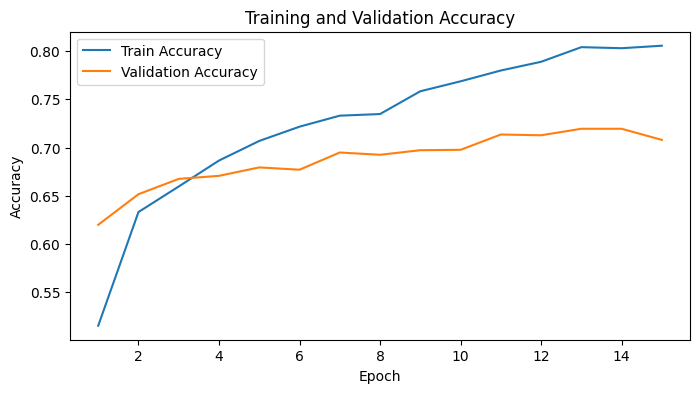

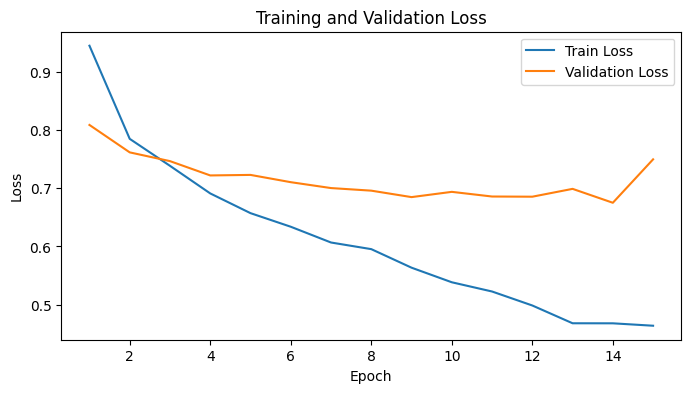

In [31]:
plot_train_metrics(history_3_classes)

### Predicciones y evaluación del modelo con fine tuning

In [32]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = y_test  

print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

99/99 [==============================] - 53s 475ms/step
true_labels: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
predicted_labels: [0 1 1 ... 1 1 2]
unique values in true_labels: [0. 1.]
unique values in predicted_labels: [0 1 2]


In [33]:
# Convertir true_labels de one-hot encoding a etiquetas enteras
true_labels = np.argmax(y_test, axis=-1)

# Imprimir las etiquetas para ver la conversión
print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

true_labels: [0 0 0 ... 1 2 2]
predicted_labels: [0 1 1 ... 1 1 2]
unique values in true_labels: [0 1 2]
unique values in predicted_labels: [0 1 2]


Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.81      0.76       997
     neutral       0.63      0.44      0.51       979
    positive       0.75      0.86      0.80      1174

    accuracy                           0.71      3150
   macro avg       0.70      0.70      0.69      3150
weighted avg       0.70      0.71      0.70      3150



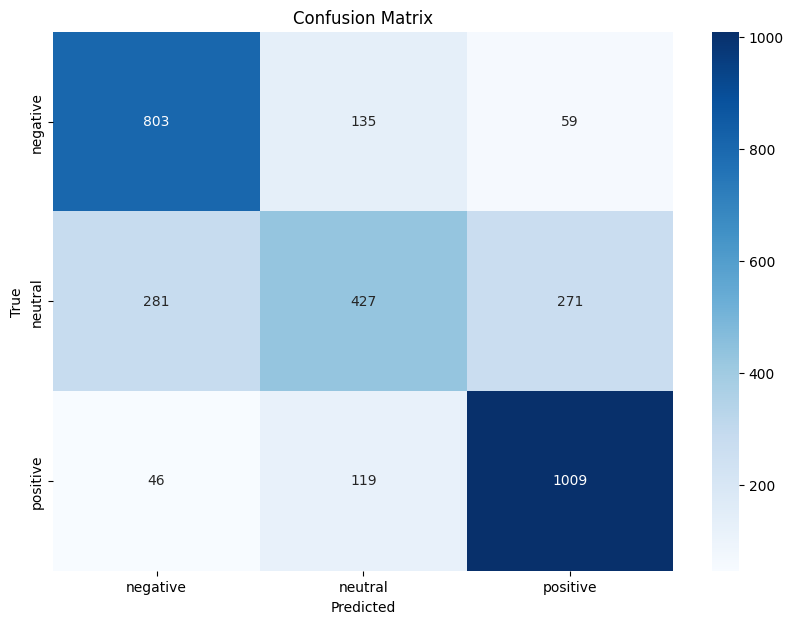

In [34]:
# Imprimir el classification report y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluar el modelo

print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=['negative', 'neutral', 'positive']))

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
print(scores[0])
print(scores[1])
print(scores[2])

99/99 [==============================] - 55s 502ms/step - loss: 0.7195 - accuracy: 0.7108 - f1_score: 0.6908 - precision: 0.7231 - recall: 0.6879
0.7194818258285522
0.710793673992157
0.6908453702926636


### Guardar el modelo

In [36]:
model.save_weights('bert_model_weights_fine_tuning.weights.h5')

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


### Levantar el modelo

In [6]:
import tensorflow as tf

bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_model.bert.trainable = True 

input_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# Usar el modelo BERT
outputs = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = outputs.pooler_output

# Añadir capas adicionales
x = tf.keras.layers.Dropout(0.2)(pooled_output)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Reconstruir el modelo
final_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compilar el modelo con el optimizador y las métricas
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
final_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [7]:
# Cargar los pesos guardados
final_model.load_weights('bert_model_weights_fine_tuning.weights.h5')
final_model.summary()

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 139)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 139)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 139, 7                                       

### Guardar el modelo con los pesos + arquitectura

In [24]:
final_model.save('final_model_fine_tuning.keras')

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


### Testeo

In [18]:
class_names = ['negative 😡', 'neutral 😐', 'positive 😊']

def test_app(text, model):
    tf_batch = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length, # truncates if len(s) > max_length
        return_token_type_ids=False,
        return_attention_mask=True,
        pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
        truncation=True,
        return_tensors='tf'
    )

    print("Inputs ids:", tf_batch['input_ids'])
    print("Attention mask:", tf_batch['attention_mask'])

    X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]
    
    y_prob_ensayo = model.predict(X_ensayo)
    y_prob = np.argmax(y_prob_ensayo, axis=1)
    print("Clasificación:", class_names[int(y_prob)])

In [19]:
text = "I hate this app, it's horrible!"

test_app(text, final_model)

Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439  1010  2009  1005  1055  9202   999   102
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [20]:
text2 = "I love this app! is user friendly"
test_app(text2, final_model)

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999  2003  5310  5379   102     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
import gradio as gr
import numpy as np
import tensorflow as tf

def predict_sentiment(text):
    tf_batch = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        return_token_type_ids=False,
        return_attention_mask=True,
        pad_to_max_length=True,
        truncation=True,
        return_tensors='tf'
    )

    X_ensayo = [tf_batch['input_ids'], tf_batch['attention_mask']]
    
    y_prob_ensayo = final_model.predict(X_ensayo)
    y_prob = np.argmax(y_prob_ensayo, axis=1)
    
    return class_names[int(y_prob)]

# Crear la interfaz de Gradio
iface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Clasificación de Sentimientos con BERT",
    description="Ingrese un texto para clasificar su sentimiento.",
    theme="soft"
)

# Iniciar la interfaz
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 0s 402ms/step


![image-2.png](../img/image.png)

![image-2.png](../img/image-1.png)

![image-2.png](../img/image-2.png)

## Conclusiones

A partir del reporte de clasificación, se pueden sacar las siguientes conclusiones:

1. Desempeño General del Modelo:

- El modelo tiene una precisión global del 71%, lo que indica que en promedio, el 71% de las predicciones son correctas. Esta precisión es razonable, pero hay margen para mejorar.

2. Rendimiento por Clase:

- Clase "Negative": El modelo tiene el mejor rendimiento en la clase "negative", con una precisión del 71%, un recall del 81% y un F1-score del 76%. Esto sugiere que el modelo identifica bien las reseñas negativas y rara vez se pierde un ejemplo de esta clase.

- Clase "Neutral": La clase "neutral" es la más difícil de predecir para el modelo, con una precisión del 63%, un recall del 44% y un F1-score del 51%. El bajo recall indica que muchas reseñas neutras no se están clasificando correctamente, lo que sugiere un problema en la diferenciación entre reseñas neutras y las otras clases.

- Clase "Positive": La clase "positive" tiene el mejor rendimiento en términos de recall (86%), lo que significa que el modelo captura la mayoría de las reseñas positivas. Además, la precisión es del 75% y el F1-score es del 80%, indicando un buen equilibrio entre precisión y recall para esta clase.

3. Promedios Macro y Ponderados:

- Macro promedio: La media macro (70% precisión, 70% recall, 69% F1-score) muestra un rendimiento equilibrado en general, sin dar mayor peso a las clases con más ejemplos.

- Promedio ponderado: El promedio ponderado (70% precisión, 71% recall, 70% F1-score) tiene en cuenta el soporte de cada clase, mostrando que el modelo mantiene un desempeño similar al evaluar todas las clases juntas.

4. Áreas de Mejora:

- Se observa que el modelo tiene dificultades con la clase "neutral". Es importante ajustar el modelo o mejorar los datos para ayudar a diferenciar mejor entre neutral, positivo y negativo, ya que esta clase tiene el rendimiento más bajo.

El modelo es razonablemente efectivo, especialmente en la clasificación de reseñas negativas y positivas, pero necesita mejoras en la clasificación de reseñas neutras. Hay que considerar ajustes a futuro en la arquitectura o el conjunto de datos podría ayudar a equilibrar mejor el rendimiento entre todas las clases.